# Convolutional Neural Networks

Convolutional Neural Networks (CNNs) are a class of deep neural networks primarily designed for analyzing visual data, such as images or videos. They are inspired by the organization of the animal visual cortex and are well-suited for tasks like image recognition, object detection, and image segmentation.

CNNs use a technique called convolution instead of general matrix multiplication in at least one of their layers. Convolution is a specialized kind of linear operation.

CNNs apply **filters** to an input image to detect features like edges or shapes. The filters slide over the width and height of the input image and compute dot products between the filter and the input to produce an **feature map** (or activation map).

Activation maps are fed into **pooling layers** that downsample the maps to reduce the dimensionality. The final layer is a fully connected layer that classifies the input image into categories, as we have seen before.

<figure>
<img src="https://github.com/bbirke/ml-python/blob/main/images/conv_net.png?raw=true" alt="ai-ml-dl" width="1000"/>
<figcaption>Fig.3 - The convolution over the whole image.</figcaption>
</figure>

## Convolution

An image convolution is simply a matrix applied to an image. It works by determining the value of a central pixel by adding the weighted values of all its neighbors together. The output is a new modified filtered image.

This applied matrix of numbers that is used in image convolutions is called a **kernel**. Differently sized kernels containing different patterns of
numbers and produce different results under convolution. The size of a kernel can be arbitrary but kernel size of $3 \times 3$ is often used.

Mathematically a convolution is defined as

$$ g(x,y)=\omega *f(x,y)=\sum _{i=-a}^{a}{\sum _{j=-b}^{b}{\omega (i,j)f(x-i,y-j)}}$$

where $g(x,y)$ is the filtered image, $f(x,y)$ is the original image, and $\omega$ is the filter kernel.

To understand what the convolutional operation does, we can demonstrate it on an image.

In [1]:
!wget -O lilo.png https://github.com/bbirke/ml-python/blob/main/images/lilo.png?raw=true

--2024-03-11 14:02:11--  https://github.com/bbirke/ml-python/blob/main/images/lilo.png?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/bbirke/ml-python/raw/main/images/lilo.png [following]
--2024-03-11 14:02:11--  https://github.com/bbirke/ml-python/raw/main/images/lilo.png
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bbirke/ml-python/main/images/lilo.png [following]
--2024-03-11 14:02:11--  https://raw.githubusercontent.com/bbirke/ml-python/main/images/lilo.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Lengt

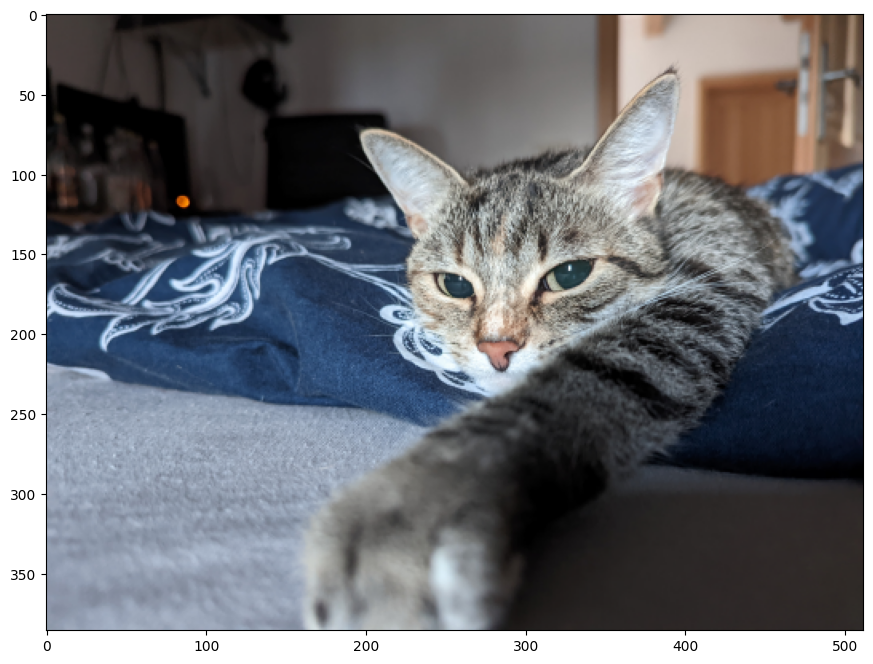

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('lilo.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(image)

In [3]:
kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
])

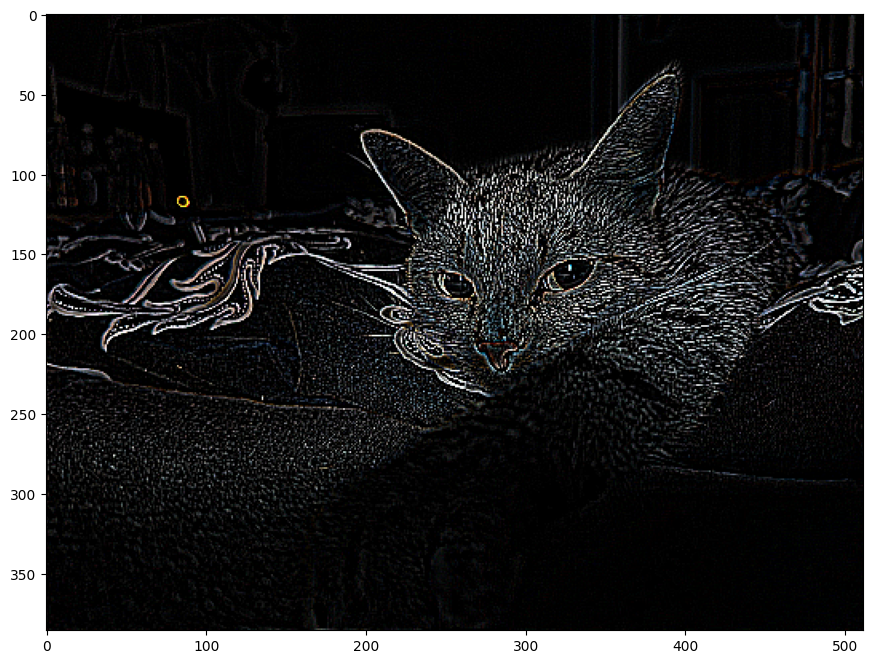

In [4]:
img = cv2.filter2D(image, -1, kernel)
fig, ax = plt.subplots(1, figsize=(12,8))
plt.imshow(img)

The kernel we used is known as the discrete Laplace operator (or sometimes just Laplace kernel for image filters) and is often used for edge detection in images.

Let's consider this image matrix and a $3 \times 3$ kernel.

<figure>
<img src="https://github.com/bbirke/ml-python/blob/main/images/conv1.png?raw=true" alt="ai-ml-dl" width="600"/>
<figcaption>Fig.1 - A random image matrix and a 3x3 kernel.</figcaption>
</figure>

The first value of our filtered image will be calculated by multiplying the weights of the kernel with the neighbouring pixel values and adding them up.

<figure>
<img src="https://github.com/bbirke/ml-python/blob/main/images/conv3.png?raw=true" alt="ai-ml-dl" width="800"/>
<figcaption>Fig.2 - The resulting value of our filtered image.</figcaption>
</figure>

The kernel slides through all pixel values of our image and continues this operation.

<figure>
<img src="https://github.com/bbirke/ml-python/blob/main/images/conv.gif?raw=true" alt="ai-ml-dl" width="600"/>
<figcaption>Fig.3 - The convolution over the whole image.</figcaption>
</figure>

A usefull tool for further visualization can be found [here](https://ezyang.github.io/convolution-visualizer/).




In a CNN convolutional layers apply the convolution operation to the input, passing a filter over the entire image. This filter detects features like edges or curves in the image. Multiple filters can detect different features.

The convolution operation combines the input and filter to create a feature map, which shows the locations and strength of the features detected. By stacking multiple convolutional layers and learning the weights of its filters, the network can detect higher-level and more complex features.

## Pooling

Pooling layers are inserted between convolutional layers. They downsample the feature maps to reduce the number of parameters, control overfitting and make the network invariant to small translations.

The most common types are max pooling, which takes the largest value in a kernel, and average pooling, which takes the average. Pooling layers subsample the feature map, keeping only the most important information.

<figure>
<img src="https://github.com/bbirke/ml-python/blob/main/images/conv_pooling.png?raw=true" alt="ai-ml-dl" width="800"/>
<figcaption>Fig.4 - Max pooling and average pooling on an image.</figcaption>
</figure>